In [1]:
import pandas as pd
import networkx as nx
import queue
from collections import deque
import matplotlib.pyplot as plt
import math

enter the starting node  3
please enter the goal node  5
press 1 for best first search 2 for  breadth first search and  3 for depth first search  2


NetworkXError: The node 3 is not in the graph.

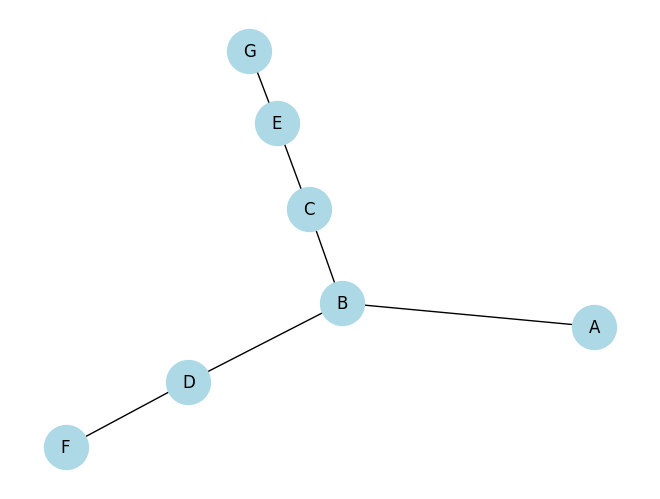

In [2]:

ad=pd.read_csv(r"/home/noone/Documents/jupyternotebook/notebooks/lab3&4Task(bfs-dfs-bfs)/SimpleGraph.csv")

# print(ad)
G = nx.from_pandas_edgelist(ad, 'Source', 'Destination',['Weight'])

pos = nx.spring_layout(G)


# Show the plot
start_node=str(input("enter the starting node ")).upper()
goal_node=str(input("please enter the goal node ")).upper()

option = int(input("press 1 for best first search 2 for  breadth first search and  3 for depth first search "))
#----------------------------------------------
if(option==1):
    #
    def euclidean_distance(node1, node2, pos):
        x1, y1 = pos[node1]
        x2, y2 = pos[node2]
        return math.sqrt((x2 - x1)*2 + (y2 - y1)*2)

    def best_first_search(graph, start, goal, heuristic):
        visited = set()
        pri_queue = queue.PriorityQueue()  # Priority queue
        pri_queue.put((heuristic[start], [start]))  # Initial state

        while not pri_queue.empty():
            heruistic_current, current_path = pri_queue.get()
            current_node = current_path[-1]

            if current_node == goal:
                return current_path  # Goal found

            visited.add(current_node)

            for neighbor in graph.neighbors(current_node):
                if neighbor not in visited:
                    new_path = current_path + [neighbor]
                    pri_queue.put((heuristic[neighbor], new_path))

        return []  # Goal not found


    heuristic = {node: euclidean_distance(node, goal_node, pos) for node in G.nodes}

    path = best_first_search(G, start_node, goal_node, heuristic)
    if path:
        print("Path from {} to {} found: {}".format(start_node, goal_node, ' -> '.join(path)))
    else:
        print("No path found from {} to {}".format(start_node, goal_node))

    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, edge_color='k', linewidths=1, font_size=15)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    # plt.show()
    
elif(option==2):
    def bfs(graph, start, goal):
        visited = set()
        queue = deque([(start, [start])])

        while queue:
            node, path = queue.popleft()
            if node == goal:
                return path
            visited.add(node)

            for neighbor in graph.neighbors(node):
                if neighbor not in visited:
                    queue.append((neighbor, path + [neighbor]))

    nx.draw(G, with_labels=True, node_color='lightblue', node_size=1000)
    path = bfs(G, start_node, goal_node)

    if path:
        print(f"BFS path from node {start_node} to node {goal_node}: {path}")
    else:
        print(f"No path found from node {start_node} to node {goal_node}.")
  
elif(option == 3):
    def dfs(graph, start, goal):    
        visited = set()

        def dfs_recursive(node, path):
            if node == goal:
                return path
            visited.add(node)

            for neighbor in graph.neighbors(node):
                if neighbor not in visited:
                    new_path = dfs_recursive(neighbor, path + [neighbor])
                    if new_path:
                        return new_path
            return None

        return dfs_recursive(start, [start])

    nx.draw(G, with_labels=True, node_color='lightblue', node_size=1000)

    path = dfs(G, start_node, goal_node)

    if path:
        print(f"DFS path from node {start_node} to node {goal_node}: {path}")
    else:
        print(f"No path found from node {start_node} to node {goal_node}.")
    
else:
    print("option not found 'error 404!' ")